# Online Retail EDA and Marketing KPIs 

In [639]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

## Load and Examine Data

In [640]:
df = pd.read_csv("Sales-Export_2019-2020.csv")

In [641]:
df

,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id
0,Sweden,"17,524.02",14122.61,2/12/2020,Books,Goldner-Dibbert,Maxie Marrow,Madelon Bront,Mobile,70-0511466
1,Finland,"116,563.40",92807.78,9/26/2019,Games,Hilll-Vandervort,Hube Corey,Wat Bowkley,Mobile,28-6585323
2,Portugal,"296,465.56",257480.34,7/11/2019,Clothing,Larkin-Collier,Celine Tumasian,Smitty Culverhouse,PC,58-7703341
3,Portugal,"74,532.02",59752.32,4/2/2020,Beauty,Hessel-Stiedemann,Celine Tumasian,Aurelie Wren,PC,14-6700183
4,Spain,"178,763.42",146621.76,12/22/2019,Games,Johns and Sons,Emalia Dinse,Bertha Walbrook,Tablet,15-8765160
...,...,...,...,...,...,...,...,...,...,...
995,France,"46,296.26",40319.41,5/15/2020,Games,Wisoky Inc,Othello Bowes,Amelina Piscopiello,Tablet,77-3489084
996,Belgium,"118,061.05",101131.10,7/2/2020,Appliances,Johns and Sons,Lambert Norheny,Collin Mackness,Mobile,59-2117058
997,Finland,"74,480.56",60023.88,3/6/2020,Clothing,Homenick-Marvin,Hube Corey,Wat Bowkley,PC,31-1849120
998,Spain,"87,205.01",69171.01,6/18/2020,Games,Johns and Sons,Emalia Dinse,Manuel Goudie,Tablet,45-3085595


In [642]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            1000 non-null   object 
 1    order_value_EUR   1000 non-null   object 
 2    cost              1000 non-null   float64
 3   date               1000 non-null   object 
 4   category           1000 non-null   object 
 5   customer_name      1000 non-null   object 
 6   sales_manager      1000 non-null   object 
 7   sales_rep          1000 non-null   object 
 8   device_type        1000 non-null   object 
 9   order_id           1000 non-null   object 
dtypes: float64(1), object(9)
memory usage: 78.2+ KB


We can see that some of the columns appear to have extra white spaces, which will be removed. Additionally, we will casefold all column titles for constency. Additionally, order_value_EUR is currently an object datatype, but this should be a float.

We also have a date column stored as an object datatype, which will be converted to a datetime format.

## Data Cleaning

In [643]:
# We can see that there are extra spaces in column titles
df.columns.tolist()

['country',
 ' order_value_EUR ',
 ' cost ',
 'date',
 'category',
 'customer_name',
 'sales_manager',
 'sales_rep',
 'device_type',
 'order_id']

In [644]:
# Strip white spaces and make all columns lowercase for consistency
df.columns = df.columns.str.strip().str.lower()

In [645]:
df.columns.tolist()

['country',
 'order_value_eur',
 'cost',
 'date',
 'category',
 'customer_name',
 'sales_manager',
 'sales_rep',
 'device_type',
 'order_id']

In [646]:
df["order_value_eur"]

0       17,524.02
1      116,563.40
2      296,465.56
3       74,532.02
4      178,763.42
          ...    
995     46,296.26
996    118,061.05
997     74,480.56
998     87,205.01
999    107,716.72
Name: order_value_eur, Length: 1000, dtype: object

We can see that commas are included in the values, causing python to interpret these values as strings. These values will be stripped.

In [647]:
# Remove comma and cast as float
df["order_value_eur"] = df["order_value_eur"].str.replace(",", "").astype("float64")

In [648]:
# Rename column to revenue
df = df.rename(columns={"order_value_eur": "revenue"})

In [649]:
df["revenue"]

0       17524.02
1      116563.40
2      296465.56
3       74532.02
4      178763.42
         ...    
995     46296.26
996    118061.05
997     74480.56
998     87205.01
999    107716.72
Name: revenue, Length: 1000, dtype: float64

In [650]:
# View date column
df["date"]

0       2/12/2020
1       9/26/2019
2       7/11/2019
3        4/2/2020
4      12/22/2019
          ...    
995     5/15/2020
996      7/2/2020
997      3/6/2020
998     6/18/2020
999     1/18/2020
Name: date, Length: 1000, dtype: object

In [651]:
# Split apart date parts
df["date_parts"] = df["date"].str.split("/")

# Create columns for each part, left padding month and day to include a 0 if date is one digit
df["month"] = df["date_parts"].str[0].str.zfill(2)
df["day"] = df["date_parts"].str[1].str.zfill(2)
df["year"] = df["date_parts"].str[2]

# Create column order_date as new date column is ISO8601 format
df["order_date"] = pd.to_datetime((df["year"] + "-" + df["month"] + "-" + df["day"]), format="ISO8601")

# Drop other date columns
df.drop(["month", "day", "year", "date_parts", "date"], axis=1, inplace=True)

In [652]:
df.head()

,country,revenue,cost,category,customer_name,sales_manager,sales_rep,device_type,order_id,order_date
0,Sweden,17524.02,14122.61,Books,Goldner-Dibbert,Maxie Marrow,Madelon Bront,Mobile,70-0511466,2020-02-12
1,Finland,116563.40,92807.78,Games,Hilll-Vandervort,Hube Corey,Wat Bowkley,Mobile,28-6585323,2019-09-26
2,Portugal,296465.56,257480.34,Clothing,Larkin-Collier,Celine Tumasian,Smitty Culverhouse,PC,58-7703341,2019-07-11
3,Portugal,74532.02,59752.32,Beauty,Hessel-Stiedemann,Celine Tumasian,Aurelie Wren,PC,14-6700183,2020-04-02
4,Spain,178763.42,146621.76,Games,Johns and Sons,Emalia Dinse,Bertha Walbrook,Tablet,15-8765160,2019-12-22


In [653]:
# Reorder columns
columns = df.columns.tolist()
columns = columns[-2:] + columns[:-2]
df = df[columns]

In [654]:
df.head()

,order_id,order_date,country,revenue,cost,category,customer_name,sales_manager,sales_rep,device_type
0,70-0511466,2020-02-12,Sweden,17524.02,14122.61,Books,Goldner-Dibbert,Maxie Marrow,Madelon Bront,Mobile
1,28-6585323,2019-09-26,Finland,116563.40,92807.78,Games,Hilll-Vandervort,Hube Corey,Wat Bowkley,Mobile
2,58-7703341,2019-07-11,Portugal,296465.56,257480.34,Clothing,Larkin-Collier,Celine Tumasian,Smitty Culverhouse,PC
3,14-6700183,2020-04-02,Portugal,74532.02,59752.32,Beauty,Hessel-Stiedemann,Celine Tumasian,Aurelie Wren,PC
4,15-8765160,2019-12-22,Spain,178763.42,146621.76,Games,Johns and Sons,Emalia Dinse,Bertha Walbrook,Tablet


In [655]:
# Check for duplicates

df[df.duplicated()]

,order_id,order_date,country,revenue,cost,category,customer_name,sales_manager,sales_rep,device_type


In [656]:
# Examine order_id to see if this is a unique identifier. It appears to be an identifier.
df["order_id"].value_counts().sort_values(ascending=False)

order_id
70-0511466    1
32-3534634    1
26-9948924    1
63-0019978    1
58-7703341    1
             ..
08-0446109    1
77-3489084    1
59-2117058    1
31-1849120    1
61-3294149    1
Name: count, Length: 1000, dtype: int64

In [657]:
# Examine countries
df["country"].unique()

array(['Sweden', 'Finland', 'Portugal', 'Spain', 'UK', 'France',
       'Netherlands', 'Belgium', 'Bulgaria', 'Luxembourg', 'Italy',
       'Ireland', 'Germany', 'Denmark', 'Austria'], dtype=object)

In [658]:
# Rename UK as "United Kingdom" for consistency"
df.loc[df["country"] == "UK", "country"] = "United Kingdom"

In [659]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       1000 non-null   object        
 1   order_date     1000 non-null   datetime64[ns]
 2   country        1000 non-null   object        
 3   revenue        1000 non-null   float64       
 4   cost           1000 non-null   float64       
 5   category       1000 non-null   object        
 6   customer_name  1000 non-null   object        
 7   sales_manager  1000 non-null   object        
 8   sales_rep      1000 non-null   object        
 9   device_type    1000 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 78.2+ KB


## Exploratory Data Analysis

In [660]:
# View distributions of numeric/date columns
df.describe()

,order_date,revenue,cost
count,1000,1000.000000,1000.000000
mean,2020-01-01 05:41:16.799999744,113361.738710,94369.310990
min,2019-01-02 00:00:00,15100.570000,12113.680000
25%,2019-06-30 18:00:00,65310.862500,54247.957500
50%,2020-01-05 00:00:00,105419.425000,87094.760000
75%,2020-06-26 00:00:00,151192.642500,125570.837500
max,2020-12-30 00:00:00,383996.760000,304701.430000
std,NaN,61775.335675,51540.020934


We can see the order dates encompass from the the beginning of 2019 through the end of 2020. We can also see that the orders tend to be fairly high in price, with the mean and median orders both being over 100000 Euros. We can also see that profit margain are fairly low, with mean and max cost both around 90000 Euros.

We will further examine these distributions visually below.

Text(0.5, 0, 'Order Cost')

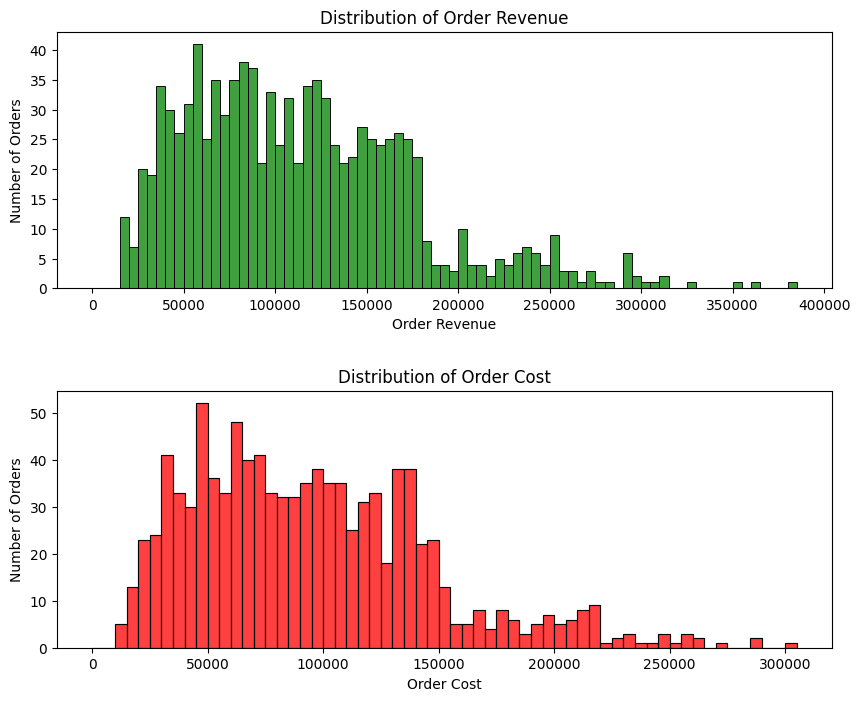

In [661]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
plt.subplots_adjust(hspace=0.4)

sns.histplot(df["revenue"], ax=ax[0], bins=np.arange(0, df["revenue"].max() + 5000, 5000), color="green")
ax[0].set_title("Distribution of Order Revenue")
ax[0].set_ylabel("Number of Orders")
ax[0].set_xlabel("Order Revenue")


sns.histplot(df["cost"], ax=ax[1], bins=np.arange(0, df["cost"].max() + 5000, 5000), color="red")
ax[1].set_title("Distribution of Order Cost")
ax[1].set_ylabel("Number of Orders")
ax[1].set_xlabel("Order Cost")

We can see that the distribution of the revenue and cost is skewed slightly towards the right.

In [662]:
# Revenue by Country

rev_country = df.groupby("country")["revenue"].sum().round().astype(int).sort_values(ascending=False).reset_index()
rev_country

,country,revenue
0,Portugal,27796362
1,France,25900678
2,Sweden,19637204
3,United Kingdom,12115617
4,Finland,5548035
5,Ireland,4952285
6,Bulgaria,3482145
7,Netherlands,3224665
8,Luxembourg,2913550
9,Germany,2794049


Text(0, 0.5, 'Revenue in Millions')

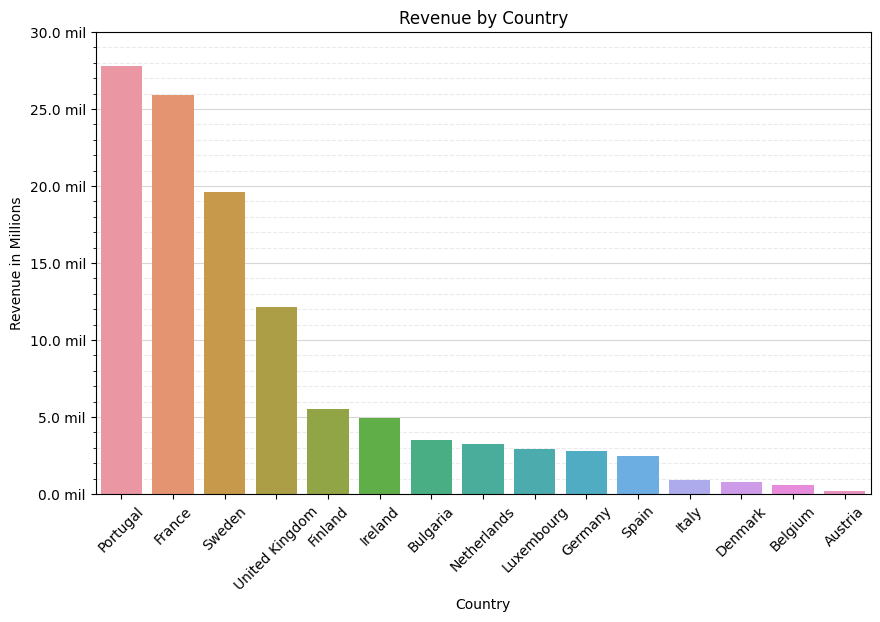

In [663]:
# Create axis and figure
fig, ax = plt.subplots(figsize=(10,6))

# plot
sns.barplot(x="country", y="revenue", data=rev_country)

#Customize major grid lines
ax.grid(which="major", axis="y", linestyle="-", alpha=0.5)
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.grid(which="minor", axis="y", linestyle="--", alpha=0.25)
ax.set_axisbelow(True)

# Customize y ticks
ax.set_yticks(np.arange(0, 30000000 + 1, 5000000))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: f"{y / 1000000:.1f} mil"))

# Customize xtick labels
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=45)

# Set titles
ax.set_title("Revenue by Country")
ax.set_xlabel("Country")
ax.set_ylabel("Revenue in Millions")

In [664]:
# Revenue by Category
rev_cat = df.groupby("category")["revenue"].sum().round().astype(int).sort_values(ascending=False).reset_index()
rev_cat

,category,revenue
0,Clothing,17661682
1,Games,15321623
2,Appliances,15139669
3,Electronics,14482078
4,Books,13179979
5,Beauty,12569064
6,Smartphones,11101655
7,Outdoors,5939075
8,Accessories,4703931
9,Other,3262983


Text(0, 0.5, 'Revenue in Millions')

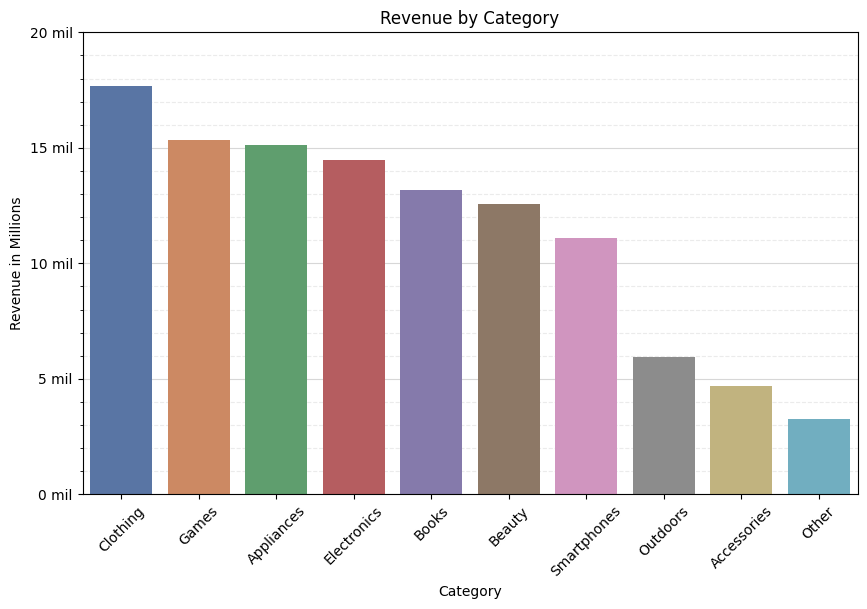

In [665]:
fig, ax = plt.subplots(figsize=(10, 6))

# plot
sns.barplot(x="category", y="revenue", data=rev_cat, palette="deep")

# Customize x labels
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=45)

#Customize major grid lines
ax.grid(which="major", axis="y", linestyle="-", alpha=0.5)
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.grid(which="minor", axis="y", linestyle="--", alpha=0.25)
ax.set_axisbelow(True)

# Customize y ticks
ax.set_yticks(np.arange(0, 20000000 + 1, 5000000))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: f"{y / 1000000:.0f} mil"))

# Set titles
ax.set_title("Revenue by Category")
ax.set_xlabel("Category")
ax.set_ylabel("Revenue in Millions")

In [666]:
# Sales by device_type

device_rev = df.groupby("device_type")["revenue"].sum().sort_values(ascending=False).round().astype(int).reset_index()
device_rev

,device_type,revenue
0,PC,89647284
1,Mobile,15447394
2,Tablet,8267061


Text(0.5, 1.0, 'Revenue Generated by Device Type')

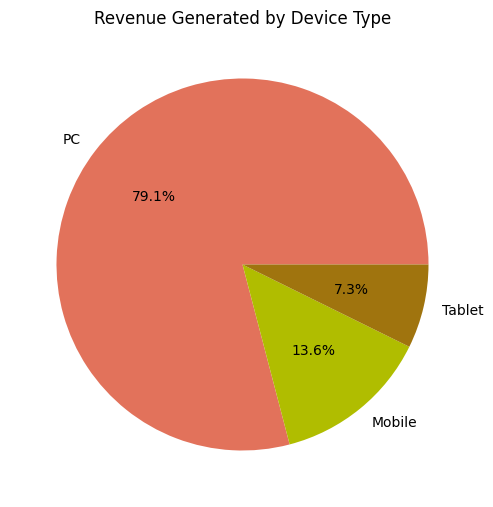

In [667]:
fig, ax = plt.subplots(figsize=(6, 10))

# Create pie chart with custom colors
colors = ["#E2725B", "#B0BD00", "#A0740E"]
ax.pie("revenue", labels="device_type", data=device_rev, colors=colors, autopct='%1.1f%%')

# Add title
ax.set_title("Revenue Generated by Device Type")

In [668]:
# Revenue over time

# Group by year and quarter
grouping_cols = [
    df["order_date"].dt.strftime("%b %Y").rename("month_year"),
    df["order_date"].dt.year.rename("year"), 
    df["order_date"].dt.month.rename("month")]
month_rev = df.groupby(grouping_cols)["revenue"].sum().round().astype(int).reset_index().sort_values(by=["year", "month"])

month_rev

,month_year,year,month,revenue
8,Jan 2019,2019,1,4516615
6,Feb 2019,2019,2,2895564
14,Mar 2019,2019,3,2521828
0,Apr 2019,2019,4,4172237
16,May 2019,2019,5,3825682
12,Jun 2019,2019,6,7692235
10,Jul 2019,2019,7,6638609
2,Aug 2019,2019,8,3437450
22,Sep 2019,2019,9,4870061
20,Oct 2019,2019,10,4372150


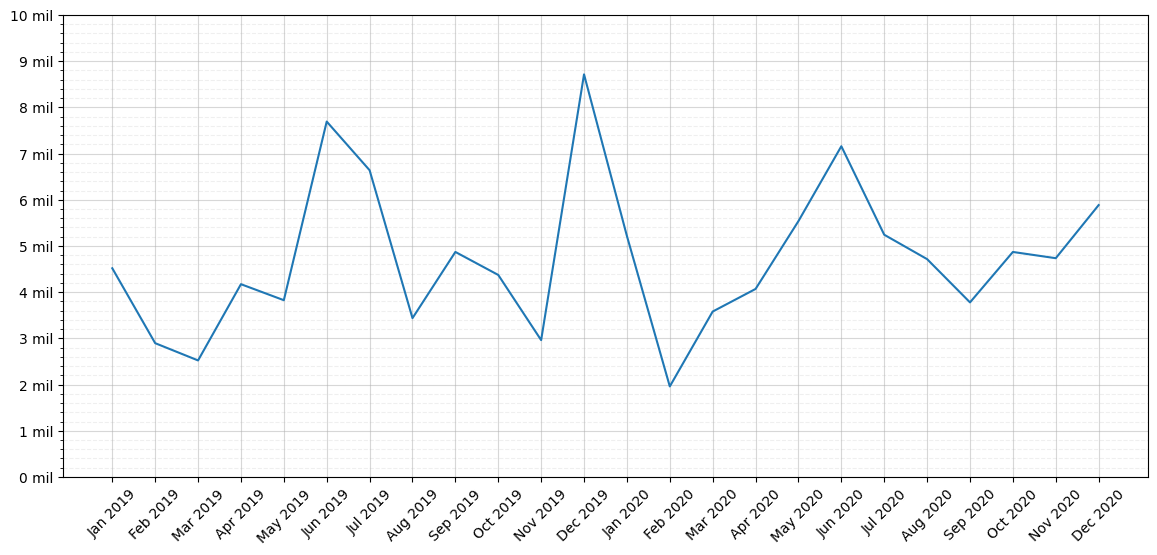

In [669]:
# Line Chart

fig, ax = plt.subplots(figsize=(14, 6))

ax.plot("month_year", "revenue", data=month_rev)

# Customize y ticks
ax.set_yticks(np.arange(0, 10000000 + 1, 1000000))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: f"{y / 1000000:.0f} mil"))

# Customize x ticks
ax.set_xticks(ticks=ax.get_xticks(), labels=ax.get_xticklabels(), rotation=45)

#Customize major grid lines
ax.grid(which="major", axis="both", linestyle="-", alpha=0.5)
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.grid(which="minor", axis="both", linestyle="--", alpha=0.2)
ax.set_axisbelow(True)

## Examining Customer Behavior

We will now examine our customer characteristics by viewing the number of orders they place and revenue generated by each customer to identify the most valued customers. We will also examine multiple marketing KPIs to examine the success of marketing efforts, QoQ.

Note that the data does not have a unique identifier for each person. For purposes of this analysis, we will assume each name is a unique individual or company.

### Distribution of Customer Purchases by Customer

In [680]:
# Examine distribution of orders by specific indivuals/companies
cust_orders = df["customer_name"].value_counts().reset_index()
cust_orders

,customer_name,count
0,Johns and Sons,142
1,Hessel-Stiedemann,55
2,"Swaniawski, Runolfsson and Green",25
3,"Dickinson, Hyatt and Berge",24
4,"Murray, Reichel and Nolan",23
...,...,...
70,"Parisian, Steuber and Satterfield",2
71,Marquardt-Kuvalis,2
72,Gorczany-Lehner,1
73,Littel-Blick,1


Text(0, 0.5, 'Count')

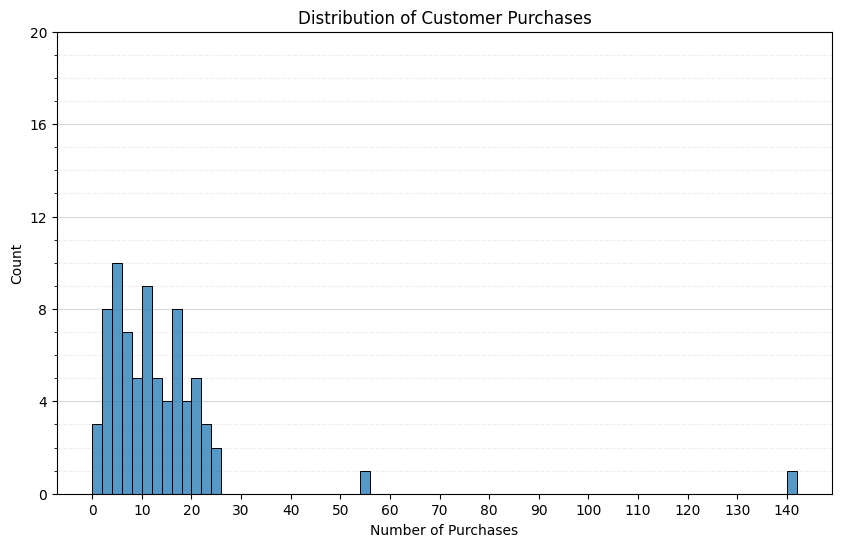

In [681]:
# Create histogram

# Count of orders
x = cust_orders["count"]

# Custom bins
bins = np.arange(0, x.max() + 1 if x.max() % 2 == 0 else x.max() + 2, 2)

fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(x=x, bins=bins)

# Set x ticks at every other bin edge (intervals of 10)
xticks = bins[::5]
ax.set_xticks(xticks)

# Set y ticks
yticks = np.arange(0, 20 + 1, 4)
ax.set_yticks(yticks)

#Customize major grid lines
ax.grid(which="major", axis="y", linestyle="-", alpha=0.5)
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.grid(which="minor", axis="y", linestyle="--", alpha=0.2)
ax.set_axisbelow(True)

# Set titles
ax.set_title("Distribution of Customer Purchases")
ax.set_xlabel("Number of Purchases")
ax.set_ylabel("Count")

### Top Customers by Revenue

In [682]:
# Revenue Per Customer
cust_rev = df.groupby("customer_name")["revenue"].sum().rename("revenue_generated")
cust_rev = cust_rev.round().astype("Int64").sort_values(ascending=False).reset_index()

# Get top 25 customers and sort ascending
top_cust = cust_rev.nlargest(25, "revenue_generated").sort_values("revenue_generated").reset_index(drop=True)
top_cust

,customer_name,revenue_generated
0,Smith Group,1810172
1,Hilll-Vandervort,1830659
2,Corwin and Sons,1856068
3,Hegmann Group,1868937
4,Dibbert Inc,1875396
5,McGlynn-Prosacco,1900325
6,"Murray, Reichel and Nolan",1938244
7,"Christiansen, Donnelly and Bechtelar",1948279
8,Kihn Inc,2003259
9,Gislason-Stanton,2010325


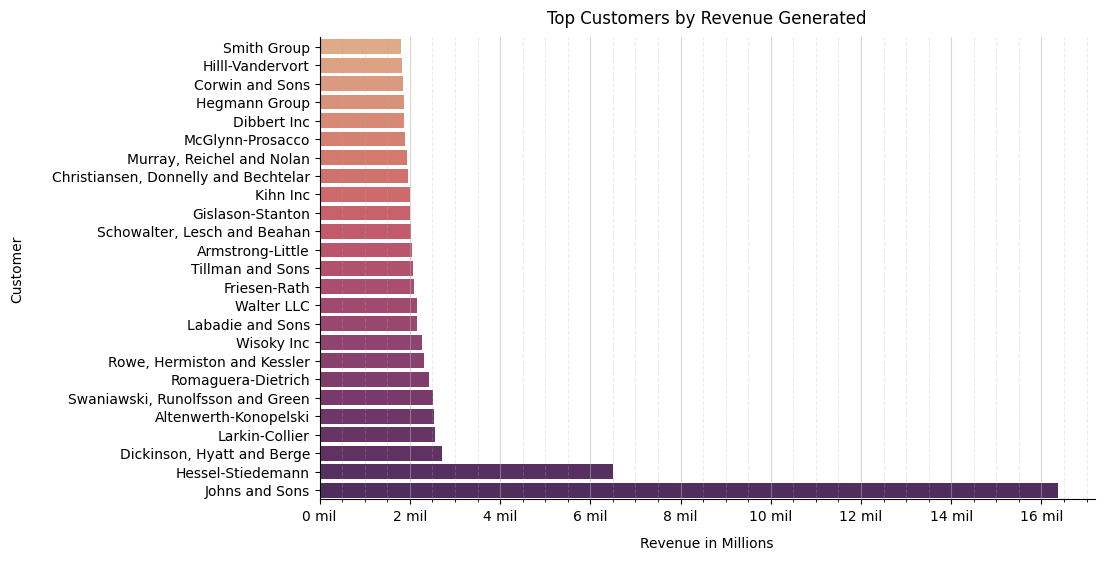

In [683]:
# Create axis
fig, ax = plt.subplots(figsize=(10, 6))

# plot
sns.barplot(x="revenue_generated", y="customer_name", data=top_cust, palette="flare")

#Customize major grid lines
ax.grid(which="major", axis="x", linestyle="-", alpha=0.5)
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.grid(which="minor", axis="x", linestyle="--", alpha=0.25)

# Set y ticks as millions
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{x / 1000000:.0f} mil"))

# Set titles
ax.set_title("Top Customers by Revenue Generated", pad=10)
ax.set_xlabel("Revenue in Millions", labelpad=10)
ax.set_ylabel("Customer", labelpad=20)

sns.despine()

plt.show()

### Marketing Metrics

In [684]:
# Create dataframe of customers who made a purchase in a specific quarter
df_quarter = df[["customer_name", "order_date"]]
df_quarter["qyear"] = df_quarter["order_date"].dt.to_period("Q")
df_quarter.drop("order_date", axis=1, inplace=True)
df_quarter.head()

,customer_name,qyear
0,Goldner-Dibbert,2020Q1
1,Hilll-Vandervort,2019Q3
2,Larkin-Collier,2019Q3
3,Hessel-Stiedemann,2020Q2
4,Johns and Sons,2019Q4


In [685]:
# Remove duplicates customers who made more than one purchase in a quarter
df_quarter.drop_duplicates(inplace=True)

In [686]:
# Generate range of years and quarters
y_range = np.arange(df_quarter["qyear"].min().year, df_quarter["qyear"].max().year + 1)
q_range = np.arange(df_quarter["qyear"].min().quarter, df_quarter["qyear"].max().quarter + 1)

# Create a list of qyears to calculate marketing metrics for
qyears = []
for year in y_range:
    for quarter in q_range:
        qyear = f"{year}Q{quarter}"
        qyears.append(qyear)
qyears

['2019Q1',
 '2019Q2',
 '2019Q3',
 '2019Q4',
 '2020Q1',
 '2020Q2',
 '2020Q3',
 '2020Q4']

In [701]:
# Initialize lists/Series to store needed metrics/customers

retained_customers = []
retention_rate = []

new_customers = []
gen_rate = []

active_customers = []
inactive_customers = []
revived_customers = []
revival_rate = []

customers_churned = []
churn_rate = []

all_cust = pd.Series()
total_customers = []

for qyear in qyears:
    df_qyear_current = df_quarter[df_quarter["qyear"] == qyear] # Create dataframe of all current period customers
    
    if qyear == "2019Q1": # Handle quarter of existence edge case
        
        new_customers.append(df_qyear_current.shape[0]) # All are new customers
        gen_rate.append(1.0) # Append 1.0 for gen_rate since all are new
        active_customers.append(df_qyear_current.shape[0]) # Calculate active customers
        
        retained_customers.append(0)
        retention_rate.append(0)
        
        inactive_customers.append(0) # Remaining numbers are 0
        revived_customers.append(0)
        revival_rate.append(0)
        customers_churned.append(0)
        churn_rate.append(0)
        
        # Add all customers to running list of customers and running count of customers
        all_cust = pd.concat([all_cust, df_qyear_current["customer_name"]], ignore_index=True)
        total_customers.append(all_cust.count())
        
    else:
        # Determine prior period
        if qyear[-1] == "1": # Handle Q1 edge case
            prior_year = str(int(qyear[:4]) - 1)
            prior_quarter = "Q4"
        else:
            prior_quarter = "Q" + str(int(qyear[-1]) -1)
            prior_year = str(qyear[:4])

        qyear_prior = prior_year + prior_quarter # Append prior year and quarter
        df_qyear_prior = df_quarter[df_quarter["qyear"] == qyear_prior] # Create dataframe of all prior period customers
        
        prior_cust= df_qyear_prior["customer_name"]
        current_cust = df_qyear_current["customer_name"]
        
        # Update current customers
        active_customers.append(current_cust.count())

        # Update new customers list
        new_cust_q = current_cust[~current_cust.isin(all_cust)]
        new_customers.append(new_cust_q.count())

        # Customer generation rate
        cust_gen_q = round((new_cust_q.count() / current_cust.count()) if current_cust.count() != 0 else 0, 4)
        gen_rate.append(cust_gen_q)

        # Retained customers
        cust_retained_q = prior_cust.isin(current_cust).sum() # Inner join to filter for retained
        retained_customers.append(cust_retained_q)

        # Retention rate
        ret_rate_q = round(((cust_retained_q / current_cust.count()) if current_cust.count() != 0 else 0), 4)
        retention_rate.append(ret_rate_q)
        
        # Customers churned
        cust_churned_q = (~prior_cust.isin(current_cust)).sum()
        customers_churned.append(cust_churned_q)
        
        # Churn rate
        churn_rate_q = round(cust_churned_q / prior_cust.count(), 4)
        churn_rate.append(churn_rate_q)

        # Revived customers
        rev_cust_q = (~current_cust.isin(prior_cust) & current_cust.isin(all_cust)).sum()
        revived_customers.append(rev_cust_q)

        # Inactive customers
        inactive_cust_q = (~all_cust.isin(current_cust)).sum()
        inactive_customers.append(inactive_cust_q)
        
        # Revival rate
        revival_rate_q = round((rev_cust_q / inactive_cust_q) if inactive_cust_q !=0 else 0, 4)
        revival_rate.append(revival_rate_q)
        
        # Update all_cust and total_customers
        all_cust = pd.concat([all_cust, new_cust_q], ignore_index=True)
        total_customers.append(all_cust.count())

# Summarize results in dataframe
marketing_metrics_df = pd.DataFrame({
    "qyear": qyears,
    "active_customers": active_customers,
    "retained_customers": retained_customers,
    "retention_rate": retention_rate,
    "new_customers": new_customers,
    "generation_rate": gen_rate,
    "inactive_customers": inactive_customers,
    "revived_customers": revived_customers,
    "revival_rate": revival_rate,
    "customers_churned": customers_churned,
    "churn_rate": churn_rate,
    "historical_customer_count": total_customers
})

# View results
marketing_metrics_df

,qyear,active_customers,retained_customers,retention_rate,new_customers,generation_rate,inactive_customers,revived_customers,revival_rate,customers_churned,churn_rate,historical_customer_count
0,2019Q1,51,0,0.0000,51,1.0000,0,0,0.0000,0,0.0000,51
1,2019Q2,51,38,0.7451,13,0.2549,13,0,0.0000,13,0.2549,64
2,2019Q3,47,37,0.7872,3,0.0638,20,7,0.3500,14,0.2745,67
3,2019Q4,53,39,0.7358,6,0.1132,20,8,0.4000,8,0.1702,73
4,2020Q1,52,42,0.8077,2,0.0385,23,8,0.3478,11,0.2075,75
5,2020Q2,54,41,0.7593,0,0.0000,21,13,0.6190,11,0.2115,75
6,2020Q3,52,41,0.7885,0,0.0000,23,11,0.4783,13,0.2407,75
7,2020Q4,49,35,0.7143,0,0.0000,26,14,0.5385,17,0.3269,75


In [702]:
marketing_metrics_pivot = marketing_metrics_df[marketing_metrics_df.columns].astype(str)
marketing_metrics_pivot = marketing_metrics_pivot.set_index("qyear").T
marketing_metrics_pivot

qyear,2019Q1,2019Q2,2019Q3,2019Q4,2020Q1,2020Q2,2020Q3,2020Q4
active_customers,51,51,47,53,52,54,52,49
retained_customers,0,38,37,39,42,41,41,35
retention_rate,0.0,0.7451,0.7872,0.7358,0.8077,0.7593,0.7885,0.7143
new_customers,51,13,3,6,2,0,0,0
generation_rate,1.0,0.2549,0.0638,0.1132,0.0385,0.0,0.0,0.0
inactive_customers,0,13,20,20,23,21,23,26
revived_customers,0,0,7,8,8,13,11,14
revival_rate,0.0,0.0,0.35,0.4,0.3478,0.619,0.4783,0.5385
customers_churned,0,13,14,8,11,11,13,17
churn_rate,0.0,0.2549,0.2745,0.1702,0.2075,0.2115,0.2407,0.3269


### Marketing Metrics Summary Report

This report provides a comprehensive overview of the marketing metrics for an online retailer over multiple quarters. The metrics shed light on customer activity, retention, churn, and other key aspects that contribute to the retailer's performance.

#### 1. Active Customers:
The number of active customers remained relatively stable throughout the observed quarters. The highest count was in 2019Q4 with 53 customers, and the lowest was in 2019Q3 with 47 customers.

#### 2. Retained Customers and Retention Rate:
The number of retained customers varied across quarters, ranging from 37 in 2019Q3 to 42 in 2020Q1. The retention rate, representing the proportion of customers retained, showed a positive trend, peaking at 80.77% in 2020Q1.

#### 3. New Customers and Generation Rate:
The acquisition of new customers exhibited fluctuations, with the highest count of 51 new customers in 2019Q1. The generation rate, which measures the proportion of new customers, varied accordingly, reaching its lowest point of 0% in 2020Q2 and beyond, where no new customers were generated.

#### 4. Inactive and Revived Customers:
The number of inactive customers saw fluctuations, with a peak of 26 in 2020Q4. Conversely, the number of revived customers increased over time, with the highest count of 14 in 2020Q4.

#### 5. Revival Rate:
The revival rate, indicating the proportion of customers revived from inactivity, showed variations across quarters. The rate ranged from 0.35 in 2019Q3 to 0.619 in 2020Q2.

#### 6. Customers Churned and Churn Rate:
The number of customers churned displayed fluctuations, peaking at 17 in 2020Q4. The churn rate, representing the proportion of customers lost, ranged from 0.17 in 2019Q4 to 0.3269 in 2020Q4.


 <br>


In summary, the retailer's customer base showed stability over the observed period. Efforts to retain customers and revive inactive ones yielded positive results, as reflected in improved retention rates and revival rates. Churn rates fluctuated, with the highest churn rate observed in 2020Q4. The acquisition of new customers varied, with a dip in 2020Q2 that has yet to be recovered. Overall, these metrics provide valuable insights into the retailer's customer engagement and retention strategies.